# **CS 181 HW5 Problem 2**
---

#### Initialize data:

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)  # download MNIST
N = 6000 

x = mnist_trainset.data[:N]  # select N datapoints
x = x.flatten(1)             # flatten the images
x = x.float()                # convert pixels from uint8 to float
x = x.numpy()              # uncomment to use numpy (optional)

#### **Todo:** implement PCA

*Hint: see `.linalg.svd()`*

In [2]:
def pca(x, n_comps=500):
    # Remove mean
    xm = x - x.mean(axis=0)
    
    # Compute SVD
    U, S, V = np.linalg.svd(xm, full_matrices=False)
    
    # Get eigvals and PCs
    top_eigvals = (S ** 2)[:n_comps]
    top_pcomps = V.T[:,:n_comps].T

    return top_eigvals, top_pcomps

#### **Todo:** calculate cumulative fraction of variance

*Hint: see `.cumsum()`*

In [3]:
def calc_cfvs(eigvals):
    return np.cumsum(eigvals) / np.sum(eigvals)

#### **Todo:** calculate mean squared L2 norm reconstruction loss

In [4]:
def calc_errs(x, pcomps, n_comps=10):
    xm = x - x.mean(axis=0)
    err_mean = np.mean(np.linalg.norm(xm, axis=1) ** 2)

    pcs = pcomps[:n_comps]
    err_pcomp = np.mean(np.linalg.norm(xm - xm@pcs.T@pcs, axis=1) ** 2)

    return err_mean, err_pcomp

#### Plot and print errors:

In [5]:
def plot_pic(pic, ax, title=''):
    x = pic.reshape(28, 28)
    ax.imshow(x, cmap='binary')
    ax.set_title(title)
    ax.axis('off')

def make_plots(eigvals, cfvs, x_mean, pcomps):
    # plot eigenvals and cfvs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.plot(eigvals, color='tomato')
    ax1.set_title('Eigenvalues')
    ax2.plot(cfvs, color='tomato')
    ax2.set_title('CFVs')
    fig.savefig('p2_cfvs.pdf')

    # plot mean
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    plot_pic(x_mean, ax, title='Mean')
    fig.savefig('p2_mean.pdf')

    # plot top 10 pcomps
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        plot_pic(pcomps[i], axes.flat[i], title=f'PC index {i}')
    fig.savefig('p2_pcomps.pdf')

(500, 784)
Reconstruction error (using mean): 3.436024e+06
Reconstruction error (using mean and top 10 pcomps): 1.731315e+06


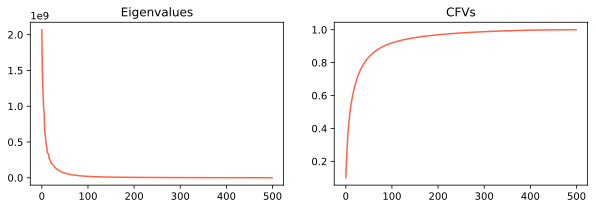

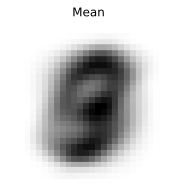

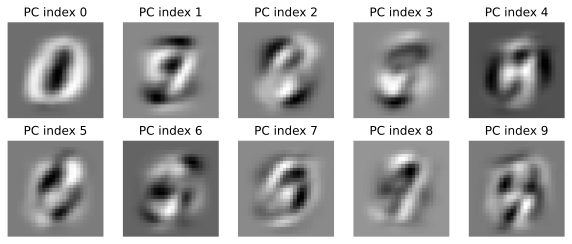

In [6]:
# do PCA
eigvals, pcomps = pca(x)

print(pcomps.shape)

# calculate CFVs
fcvs = calc_cfvs(eigvals)

# print errors
err_mean, err_pcomp = calc_errs(x, pcomps)
print(f'Reconstruction error (using mean): {err_mean:3e}')
print(f'Reconstruction error (using mean and top 10 pcomps): {err_pcomp:3e}')

# make plots
make_plots(eigvals, fcvs, x.mean(0), pcomps)